In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

In [3]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

In [22]:
my_cosmo_cat = pd.read_csv(f'{data_folder}/cosmos-matched-df.csv', index_col = 0)

In [23]:
my_cosmo_cat.head()

,SourceID,id,ssfr_best,ssfr_med_max68,ssfr_med_min68,ssfr_med,sfr_best,sfr_med_max68,sfr_med_min68,sfr_med,...,flag_shallow,l_r,l_k,l_nu,dist,RA,Dec,int_prediction,references,status
0,4000705532455,590539.0,-8.847,-8.463,-8.865,-8.712,0.508,0.835,0.477,0.655,...,1.0,28.886,28.866,28.634,0.760531,150.679664,2.196615,0.970096,['2007ApJS..172...99C'],Referenced
1,4000705532984,610283.0,-10.040,-9.922,-10.065,-9.990,0.536,0.486,0.335,0.411,...,1.0,29.517,29.731,28.687,0.685933,150.673546,2.226438,0.961160,['2007ApJS..172...99C'],Referenced
2,4000705533312,621053.0,-10.258,-10.232,-10.368,-10.300,-0.058,-0.032,-0.168,-0.100,...,1.0,29.057,29.312,28.098,0.585371,150.667975,2.242945,0.995066,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
3,4000705533383,617834.0,-9.445,-9.322,-9.470,-9.398,0.132,0.179,0.034,0.107,...,1.0,28.740,28.785,28.273,0.415082,150.645125,2.237650,0.985773,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
4,4000705539435,880099.0,-9.392,-9.337,-9.489,-9.419,0.369,0.370,0.228,0.297,...,0.0,29.013,29.102,28.507,0.803465,149.700729,2.634871,0.990081,['2007ApJS..172...99C'],Referenced


In [20]:
stu_cosmo_cat = pd.read_csv(f'{data_folder}/cat-matched-to-cosmos.csv', index_col = 0)

In [129]:
df_tmp = stu_cosmo_cat.merge(my_cosmo_cat[['SourceID', 'id']], how = 'left', on = 'SourceID')

In [130]:
df_tmp[['SourceID', 'id', 'ra_1', 'dec_1', 'ra_2', 'dec_2', 'zpdf_1', 'zpdf_2']]

,SourceID,id,ra_1,dec_1,ra_2,dec_2,zpdf_1,zpdf_2
0,4000705532984,610283.0,150.673687,2.226308,150.674777,2.225886,0.230,0.904
1,4000705533312,621053.0,150.668120,2.242867,150.668167,2.243655,0.310,0.336
2,4000705533383,617834.0,150.645145,2.237538,150.644525,2.237836,0.621,0.756
3,4000705539435,880099.0,149.700540,2.634988,149.702583,2.635736,0.260,1.769
4,4000705539529,882817.0,149.686238,2.637428,149.687548,2.637165,0.698,0.834
...,...,...,...,...,...,...,...,...
3709,6000536185363,892445.0,150.499015,2.652113,150.499316,2.651371,0.350,0.800
3710,6000536185496,898134.0,150.501189,2.663116,150.499977,2.661945,0.868,2.269
3711,6000536185585,904074.0,150.487626,2.671314,150.487177,2.671656,0.636,1.275
3712,6000536185603,906057.0,150.508960,2.672579,150.508449,2.673151,0.920,0.859


In [24]:
len(my_cosmo_cat)

3626

In [16]:
my_cosmo_cat.columns

Index(['SourceID', 'id', 'ssfr_best', 'ssfr_med_max68', 'ssfr_med_min68',
       'ssfr_med', 'sfr_best', 'sfr_med_max68', 'sfr_med_min68', 'sfr_med',
       'mass_best', 'mass_med_max68', 'mass_med_min68', 'mass_med', 'age',
       'type', 'zpdf', 'flag_deep', 'flag_shallow', 'l_r', 'l_k', 'l_nu',
       'dist', 'RA', 'Dec', 'int_prediction', 'references', 'status'],
      dtype='object')

In [26]:
stu_cosmo_cat.columns

Index(['SourceID', 'category', 'RA_1a', 'Dec_1a', 'ra_1', 'dec_1', 'type_1',
       'zpdf_1', 'zpdf_l68_1', 'zpdf_h68_1', 'zminchi2_1', 'chi2_best_1',
       'm_i_1', 'm_z_1', 'm_k_1', 'mass_med_1', 'mass_med_min68_1',
       'mass_med_max68_1', 'mass_best_1', 'sfr_med_1', 'sfr_med_min68_1',
       'sfr_med_max68_1', 'sfr_best_1', 'Separation_1', 'ra_2', 'dec_2',
       'type_2', 'zpdf_2', 'zpdf_l68_2', 'zpdf_h68_2', 'zminchi2_2',
       'chi2_best_2', 'm_i_2', 'm_z_2', 'm_k_2', 'mass_med_2',
       'mass_med_min68_2', 'mass_med_max68_2', 'mass_best_2', 'sfr_med_2',
       'sfr_med_min68_2', 'sfr_med_max68_2', 'sfr_best_2', 'Separation_2'],
      dtype='object')

In [35]:
stu_cosmo_cat_red = (
    stu_cosmo_cat[['SourceID', 'category', 'mass_best_2', 'sfr_best_2', 'zpdf_2']]
)

### Looking at Redshift

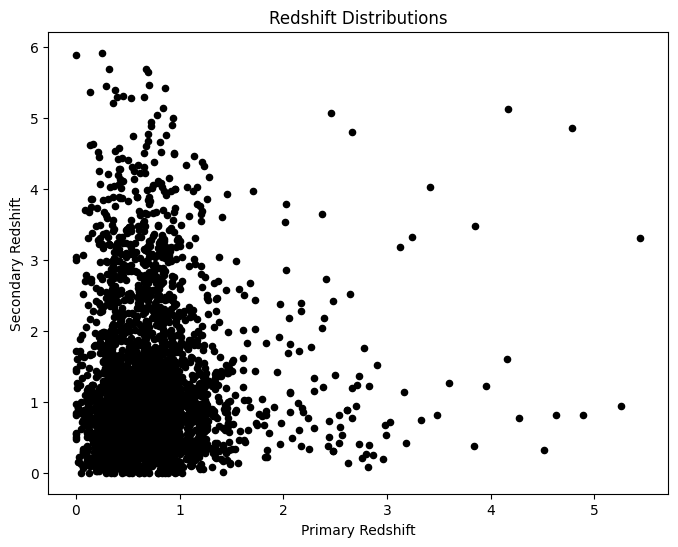

In [120]:
fig, ax1 = plt.subplots(nrows = 1)
stu_cosmo_cat.plot.scatter(
    x = 'zpdf_1',
    y = 'zpdf_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

In [47]:
cos_red = stu_cosmo_cat[['SourceID', 'zpdf_1', 'zpdf_2']]

In [48]:
zs = cos_red.assign(redshift_sub = cos_red.apply(lambda row: row.zpdf_1 - row.zpdf_2, axis = 1))

In [51]:
real_mergers = zs.query('redshift_sub < 0.1 and redshift_sub > -0.1 ')[['SourceID', 'redshift_sub']]

In [53]:
df_merg = real_mergers.merge(stu_cosmo_cat, on = 'SourceID', how = 'left')

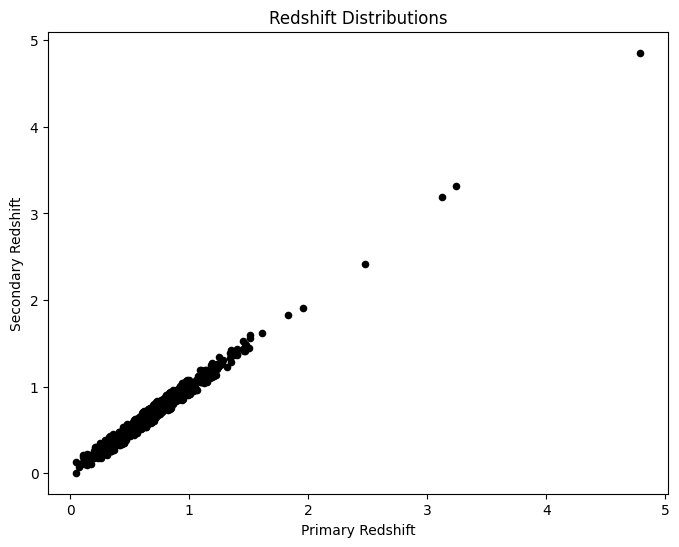

In [61]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.plot.scatter(
    x = 'zpdf_1',
    y = 'zpdf_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

### Looking at Mass Distribution

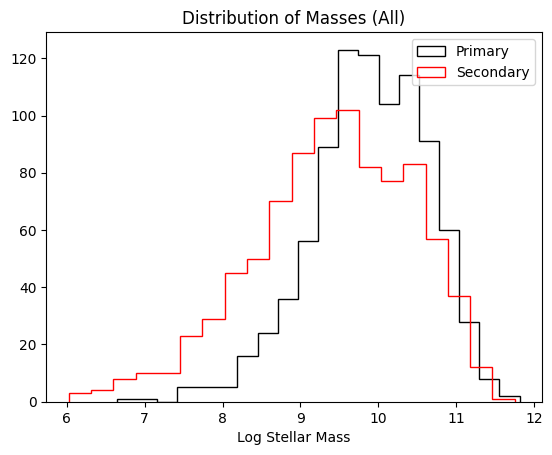

In [62]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'black',
    histtype='step',
    label = ['Primary'],
    sharex = True,
    sharey = True
)

df_merg.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Secondary'],
    sharex = True,
    sharey = True
)


ax1.set_title('Distribution of Masses (All)')
ax1.set_xlabel('Log Stellar Mass')
plt.legend()
plt.show()

In [63]:
cosmo_cat_1 = df_merg.query('category=="stage1"')
cosmo_cat_2 = df_merg.query('category=="stage2"')
cosmo_cat_3 = df_merg.query('category=="stage3"')
cosmo_cat_4 = df_merg.query('category=="stage4"')

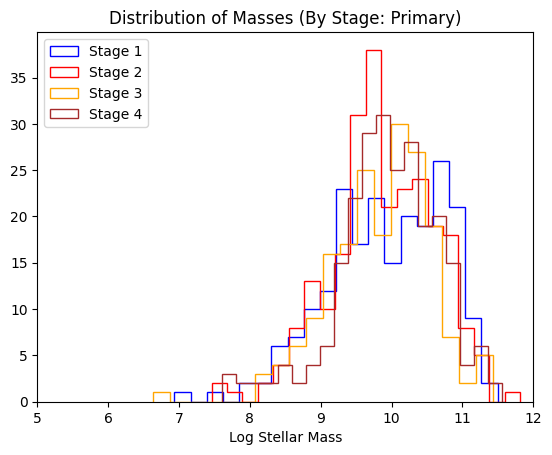

In [64]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_cat_1.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_cat_2.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_cat_3.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_cat_4.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Distribution of Masses (By Stage: Primary)')
ax1.set_xlabel('Log Stellar Mass')
ax1.set_xlim([5,12])
plt.legend(loc = 'upper left')
plt.show()

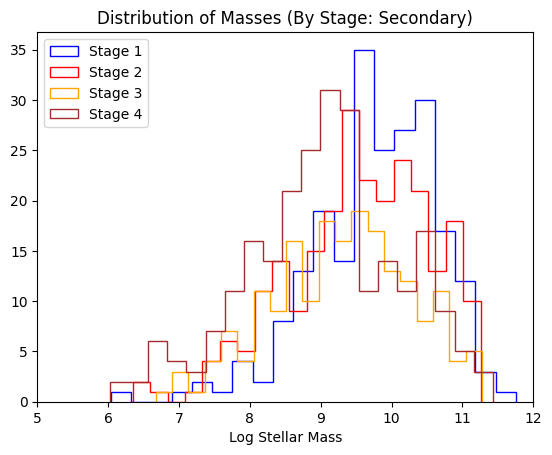

In [65]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_cat_1.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_cat_2.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_cat_3.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_cat_4.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Distribution of Masses (By Stage: Secondary)')
ax1.set_xlabel('Log Stellar Mass')
ax1.set_xlim([5,12])
plt.legend(loc = 'upper left')
plt.show()

### Checking Mass Ratios

In [66]:
def calc_ratio(log_m1, log_m2):
    m1 = 10**log_m1
    m2 = 10**log_m2
    return m2 / m1

In [70]:
cosmo_ratio = (
    df_merg
    .assign(mass_ratio = df_merg.apply(lambda row: calc_ratio(row.mass_best_1, row.mass_best_2), axis = 1))
)

In [71]:
cosmo_rat_qur = cosmo_ratio.query('mass_ratio <= 100')

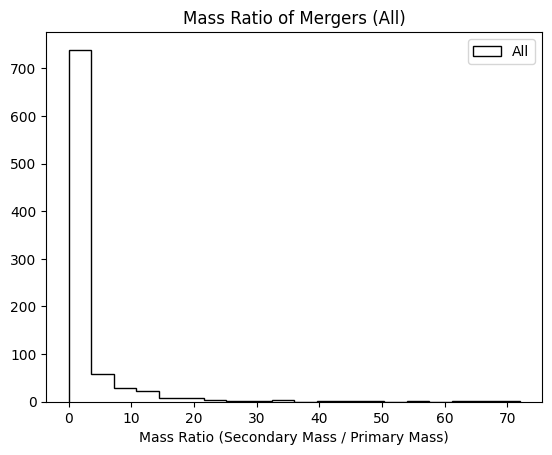

In [72]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_rat_qur.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'black',
    histtype='step',
    label = ['All'],
    sharex = True,
    sharey = True
)

ax1.set_title('Mass Ratio of Mergers (All)')
ax1.set_xlabel('Mass Ratio (Secondary Mass / Primary Mass)')
plt.legend()
plt.show()

In [73]:
tmp = len(cosmo_ratio.query('mass_ratio < 1.5')) / len(cosmo_ratio)
print(f'{tmp*100}% of this sample are major mergers of approximately 1:1 mass ratio.')

71.31608548931383% of this sample are major mergers of approximately 1:1 mass ratio.


In [74]:
cosmo_ratio_1 = cosmo_rat_qur.query('category == "stage1"')
cosmo_ratio_2 = cosmo_rat_qur.query('category == "stage2"')
cosmo_ratio_3 = cosmo_rat_qur.query('category == "stage3"')
cosmo_ratio_4 = cosmo_rat_qur.query('category == "stage4"')

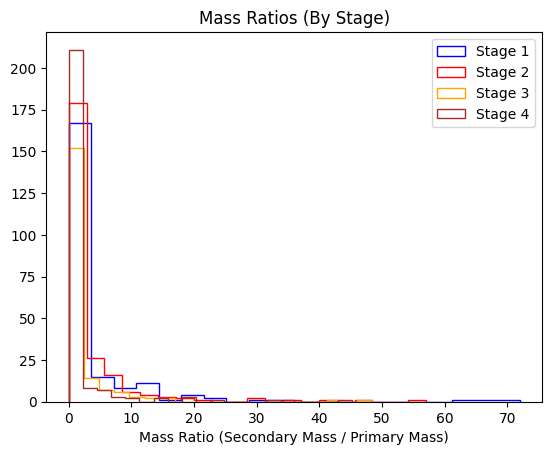

In [75]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_ratio_1.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_ratio_2.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_ratio_3.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_ratio_4.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Mass Ratios (By Stage)')
ax1.set_xlabel('Mass Ratio (Secondary Mass / Primary Mass)')
plt.legend()
plt.show()

### Linking Star Formation and Stage

In [76]:
cosmo_ratio.columns

Index(['SourceID', 'redshift_sub', 'category', 'RA_1a', 'Dec_1a', 'ra_1',
       'dec_1', 'type_1', 'zpdf_1', 'zpdf_l68_1', 'zpdf_h68_1', 'zminchi2_1',
       'chi2_best_1', 'm_i_1', 'm_z_1', 'm_k_1', 'mass_med_1',
       'mass_med_min68_1', 'mass_med_max68_1', 'mass_best_1', 'sfr_med_1',
       'sfr_med_min68_1', 'sfr_med_max68_1', 'sfr_best_1', 'Separation_1',
       'ra_2', 'dec_2', 'type_2', 'zpdf_2', 'zpdf_l68_2', 'zpdf_h68_2',
       'zminchi2_2', 'chi2_best_2', 'm_i_2', 'm_z_2', 'm_k_2', 'mass_med_2',
       'mass_med_min68_2', 'mass_med_max68_2', 'mass_best_2', 'sfr_med_2',
       'sfr_med_min68_2', 'sfr_med_max68_2', 'sfr_best_2', 'Separation_2',
       'mass_ratio'],
      dtype='object')

In [77]:
cosmo_ratio.sfr_best_2.max()

2.779

In [78]:
def categ_merger(ratio):
    if ratio > 1:
        test = 1/ratio
    if ratio > 0.10:
        return 'major'
    elif ratio <= 0.10 and ratio > 0.001:
        return 'minor'
    else:
        return 'micro'

In [79]:
cosmo_clsf = (
    cosmo_ratio
    .assign(merger_type = cosmo_ratio.mass_ratio.apply(lambda x: categ_merger(x)))
)

In [80]:
cosmo_clsf_1 = cosmo_clsf.query('category == "stage1"')
cosmo_clsf_2 = cosmo_clsf.query('category == "stage2"')
cosmo_clsf_3 = cosmo_clsf.query('category == "stage3"')
cosmo_clsf_4 = cosmo_clsf.query('category == "stage4"')

In [81]:
cosmo_clsf

,SourceID,redshift_sub,category,RA_1a,Dec_1a,ra_1,dec_1,type_1,zpdf_1,zpdf_l68_1,...,mass_med_min68_2,mass_med_max68_2,mass_best_2,sfr_med_2,sfr_med_min68_2,sfr_med_max68_2,sfr_best_2,Separation_2,mass_ratio,merger_type
0,4000705533312,-0.026,stage3,150.667975,2.242945,150.668120,2.242867,0.0,0.310,0.302,...,10.716,10.784,10.763,0.500,0.432,0.569,0.505,2.646160,3.647539,major
1,4000705539677,-0.054,stage3,149.733008,2.643656,149.732807,2.643731,0.0,0.273,0.264,...,9.916,9.987,9.929,0.101,0.032,0.170,0.067,4.405480,5.727960,major
2,4000705540005,-0.070,stage3,149.722435,2.657182,149.722263,2.657249,0.0,0.408,0.398,...,9.659,9.763,9.731,0.899,0.811,1.006,0.931,1.772460,7.095778,major
3,4000705546342,-0.098,stage2,150.283685,2.586469,150.283690,2.586751,0.0,0.250,0.243,...,9.920,9.995,10.013,0.129,0.020,0.319,0.167,4.361451,2.964831,major
4,4000707049110,0.001,stage4,150.226986,1.648158,150.226925,1.648192,0.0,0.913,0.903,...,9.564,9.636,9.600,0.800,0.731,0.868,0.784,1.256951,1.510080,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,6000536013604,0.001,stage4,150.205093,2.559233,150.205408,2.559030,0.0,0.886,0.875,...,10.402,10.531,10.430,-2.876,-4.213,-2.757,-2.856,5.563317,0.552077,major
885,6000536013658,0.047,stage4,150.189400,2.563281,150.189737,2.563100,0.0,0.651,0.644,...,7.951,8.251,8.100,-0.883,-1.194,-0.556,-1.469,3.049801,0.013062,minor
886,6000536014042,-0.046,stage1,150.166549,2.591786,150.166920,2.591556,0.0,0.726,0.712,...,9.873,9.978,9.980,-0.778,-0.874,-0.661,-0.759,2.813872,3.191538,major
887,6000536184181,0.058,stage2,150.510466,2.553997,150.510541,2.554068,0.0,0.601,0.592,...,9.954,10.032,9.981,0.314,0.236,0.391,0.308,1.557971,0.988553,major


In [82]:
cosmo_clsf.sfr_best_1.max()

2.674

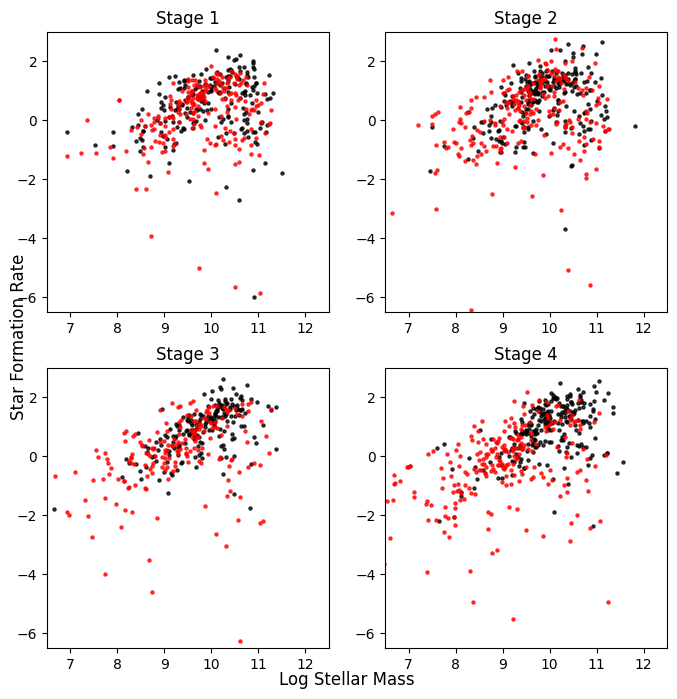

In [123]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_1), list(cosmo_clsf_1.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.75)
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_2), list(cosmo_clsf_1.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.75)
axs[0,0].set_xlim([6.5, 12.5])
axs[0,0].set_ylim([-6.5, 3])
axs[0,0].set_title('Stage 1')

axs[0,1].scatter(list(cosmo_clsf_2.mass_best_1), list(cosmo_clsf_2.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.75)
axs[0,1].scatter(list(cosmo_clsf_2.mass_best_2), list(cosmo_clsf_2.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.75)
axs[0,1].set_xlim([6.5, 12.5])
axs[0,1].set_ylim([-6.5, 3])
axs[0,1].set_title('Stage 2')

axs[1,0].scatter(list(cosmo_clsf_3.mass_best_1), list(cosmo_clsf_3.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.75)
axs[1,0].scatter(list(cosmo_clsf_3.mass_best_2), list(cosmo_clsf_3.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.75)
axs[1,0].set_xlim([6.5, 12.5])
axs[1,0].set_ylim([-6.5, 3])
axs[1,0].set_title('Stage 3')

axs[1,1].scatter(list(cosmo_clsf_4.mass_best_1), list(cosmo_clsf_4.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.75)
axs[1,1].scatter(list(cosmo_clsf_4.mass_best_2), list(cosmo_clsf_4.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.75)
axs[1,1].set_xlim([6.5, 12.5])
axs[1,1].set_ylim([-6.5, 3])
axs[1,1].set_title('Stage 4')

fig.text(0.5, 0.07, 'Log Stellar Mass', ha='center', va='center', fontsize = 12)
fig.text(0.09, 0.5, 'Star Formation Rate', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

### Mass Ratios